# Regression Analysis (II)

In this notebook, we see how regression analysis can help to **understand the data behavior**, to **predict data values** (continuous or dichotomous), and to **find important predictors** (sparse models).
We present different regression models: Simple linear regression, Multiple linear regression and Polynomial regression. 
We evaluate the results qualitatively by means of Seaborn visualization tools and quantitatively by means of Scikit-learn library, as well as other toolboxes.

We use different real data sets:
* Macroeconomic dataset
* Prediction of the Price of a New Housing Data Market
* Sea Ice Extent and Climate Change
* Diabetes Scikit-learn dataset
* Longley dataset of US macroeconomic data
* Advertising dataset

### Contents of the notebook:

- Multiple Linear Regression
- Regularization: Ridge and Lasso
- Data Transformation

In [1]:
# Settings for the visualizations
import matplotlib.pylab as plt
%matplotlib inline 
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

In [2]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.linear_model import LinearRegression


from sklearn.metrics import mean_squared_error, r2_score

In [3]:
seed = 1 # to make this notebook's output stable across runs

## Example 1: Boston Housing

Let's continue with our Boston Housing dataset.

In [4]:
# Load dataset
from sklearn import datasets
boston = datasets.load_boston() # Dictionary-like object that exposes its keys as attributes.
X,y = boston.data, boston.target # Create X matrix and y vector from the dataset.
features = boston.feature_names
print('feature names: {}'.format(boston.feature_names))
print('Shape of data: {} {}'.format(X.shape, y.shape))

feature names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Shape of data: (506, 13) (506,)


In [5]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=seed)

print('Train and test sizes of X: {} {}'.format(X_train.shape, X_test.shape))
print('Train and test sizes of y: {} {}'.format(y_train.shape, y_test.shape))

Train and test sizes of X: (50, 13) (456, 13)
Train and test sizes of y: (50,) (456,)


In [6]:
# Fitting a multiple linear model
lr = LinearRegression() # Create the Linear Regression estimator
lr.fit(X_train, y_train) # Perform the fitting


# Regrerssion coefs
coefs_lr = pd.Series(np.abs(lr.coef_), features).sort_values()

# Prediction
y_test_pred = lr.predict(X_test)

# evaluation
mse = mean_squared_error(y_test, y_test_pred)
r2score_train = lr.score(X_train, y_train)
r2score_test = lr.score(X_test, y_test)

# The coefficients
print('\nIntercept and coefs:\n{} {}'.format(lr.intercept_, lr.coef_))
# The mean squared error
print('\nMSE: {}'.format(mse))
# The coefficient of determination: 1 is perfect prediction
print('R^2 Score: {}'.format(r2score_train))
print('R^2 Score: {}'.format(r2score_test))


Intercept and coefs:
35.40837634168231 [-8.41554488e-02  7.42444001e-02  2.54853866e-01  1.77639409e+00
 -2.53858364e+01  5.25942814e+00 -2.49342023e-02 -1.21705452e+00
  3.24536403e-01 -2.60734240e-02 -9.98220746e-01 -6.91240503e-03
 -8.21871604e-02]

MSE: 32.83855497210278
R^2 Score: 0.8677571093777259
R^2 Score: 0.6224709227757255


<AxesSubplot:title={'center':'Model Coefficients'}>

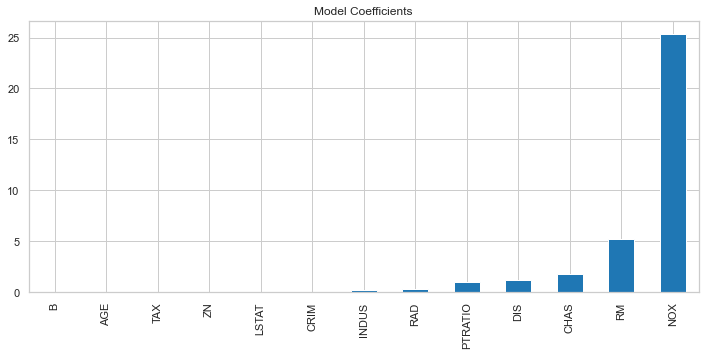

In [7]:
# Plotting abs value of model coefficients
coefs_lr.plot(kind='bar', title='Model Coefficients')

In [8]:
coefs_lr

B           0.006912
AGE         0.024934
TAX         0.026073
ZN          0.074244
LSTAT       0.082187
CRIM        0.084155
INDUS       0.254854
RAD         0.324536
PTRATIO     0.998221
DIS         1.217055
CHAS        1.776394
RM          5.259428
NOX        25.385836
dtype: float64

We can see that all the coefficients obtained are different from zero, meaning that no variable is discarded.
Next, we will try to build a new model to predict the price using the most important factors and discarding the non-informative ones. To do this, we can create a LASSO regressor, forcing zero coefficients (see below).

In [9]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Regularization Models 

### L2 Regularization: Ridge Regression.

Ridge Regression penalizes the coefficients if they are too far from zero, thus enforcing them to be small in a continuous way. This way, it decreases model complexity while keeping all variables in the model. 

$$ minimize(\sum_{i=0}^n (y_i - \beta_0- \sum_{j=1}^p \beta_jx_{ij})^2 + \alpha\sum_{j=1}^p \beta_j^2) $$
 
where $\beta_j$ are the regression coefficients.


### L1 Regularization: Lasso Regression

Often, in real problems, there are uninformative variables in the data which prevent proper modeling of the problem and thus, the building of a correct regression model. In such cases, a feature selection process is crucial to select only the informative features and discard non-informative ones. This can be achieved by sparse methods which use a penalization approach, such as *Lasso* (least absolute shrinkage and selection operator) to set some model coefficients to zero (thereby discarding those variables). Sparsity can be seen as an application of Occam’s razor: prefer simpler models to complex ones.

For that, Lasso regression adds a **$\ell_1$-norm** regularization term to the sum of squared errors of prediction (SSE).  Given the set of samples  (𝑋,𝐲) , the objetive is to minimize:

$$ minimize(\sum_{i=0}^n (y_i - \beta_0- \sum_{j=1}^p \beta_jx_{ij})^2 + \alpha\sum_{j=1}^p|\beta_j|)$$


### Geometric interpretation of regularization

The left panel shows L1 regularization (lasso regularization) and the right panel L2 regularization (Ridge regression). The ellipses indicate the distribution for no regularization. The shapes (square and cercle) show the constraints due to regularization (limiting  $\theta^2$  for ridge regression and $|\theta|$ for Lasso regression). The corners of the L1 regularization create more opportunities for the solution to have zeros for some of the weights.

<center><img src="files/images/regularization-ridge-lasso.png"></center>



More info [here](https://www.datacamp.com/community/tutorials/tutorial-ridge-lasso-elastic-net)

### Ridge


In [10]:
## Ridge Regression
ridge = linear_model.Ridge(alpha=1) # Create a Ridge regressor
ridge.fit(X_train, y_train) # Perform the fitting

# Regrerssion coefs
coefs_ridge = pd.Series(np.abs(ridge.coef_), features).sort_values()

# Prediction
y_test_pred_ridge = ridge.predict(X_test)

# evaluation
mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
r2score_ridge_train = ridge.score(X_train, y_train)
r2score_ridge_test = ridge.score(X_test, y_test)

# The coefficients
print('\nIntercept and coefs:\n{} {}'.format(ridge.intercept_, ridge.coef_))
# The mean squared error
print('\nMSE: {}'.format(mse_ridge))
# The coefficient of determination: 1 is perfect prediction
print('R^2 Score train: {}'.format(r2score_ridge_train))
print('R^2 Score test: {}'.format(r2score_ridge_test))


Intercept and coefs:
23.60833517803767 [-5.53778401e-02  9.99910460e-02  1.43443088e-01  1.21867927e+00
 -2.77148403e+00  4.09878537e+00 -2.45312926e-02 -9.48943959e-01
  4.49818982e-01 -3.89067830e-02 -5.11308982e-01  8.83852205e-04
 -2.07031918e-01]

MSE: 32.72255639408837
R^2 Score train: 0.8434071369784997
R^2 Score test: 0.6238045026532295


<AxesSubplot:title={'center':'Ridge Coefficients'}>

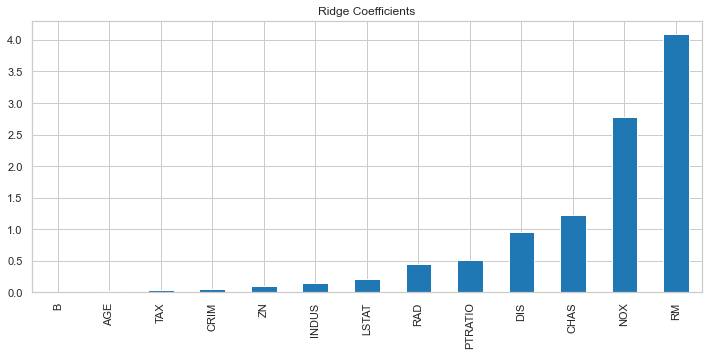

In [11]:
# Plotting abs value of model coefficients
coefs_ridge.plot(kind='bar', title='Ridge Coefficients')

### Lasso


<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

**To complete**<p>
Fit a Lasso regressor and evalute it.

</div>

In [12]:
## Lasso Regression
lasso = linear_model.Lasso(alpha=1)
lasso.fit(X_train, y_train)

# Regrerssion coefs
coefs_lasso = pd.Series(np.abs(lasso.coef_), features).sort_values()

# Prediction
y_test_pred_lasso = lasso.predict(X_test)

# evaluation
mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)

r2score_lasso_train = lasso.score(X_train, y_train)
r2score_lasso_test = lasso.score(X_test, y_test)


# The coefficients

# The mean squared error

# The coefficient of determination: 1 is perfect prediction
print(mse_lasso)
print(r2score_lasso_train, r2score_lasso_test)



43.97736019565538
0.7761459011960175 0.4944134348320205


<AxesSubplot:title={'center':'Lasso Coefficients'}>

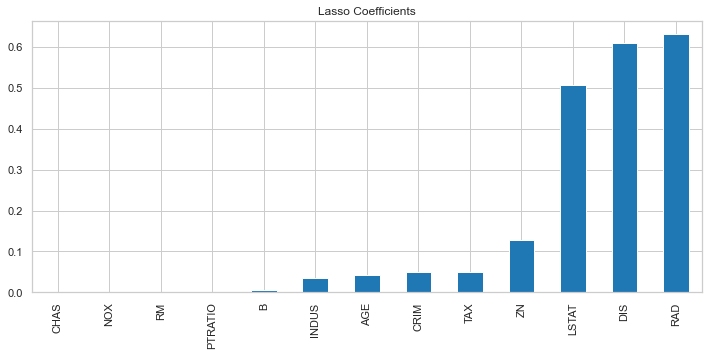

In [13]:
# Plotting abs value of model coefficients
coefs_lasso.plot(kind='bar', title='Lasso Coefficients')


In [14]:
coefs_lasso

CHAS       0.000000
NOX        0.000000
RM         0.000000
PTRATIO    0.000000
B          0.005361
INDUS      0.036006
AGE        0.041547
CRIM       0.049534
TAX        0.049926
ZN         0.128158
LSTAT      0.505767
DIS        0.608622
RAD        0.632474
dtype: float64

#### Compare the results

In [15]:
# Are the coeficients now sparse?
# Is the score different?

<AxesSubplot:title={'center':'coefs_lasso'}>

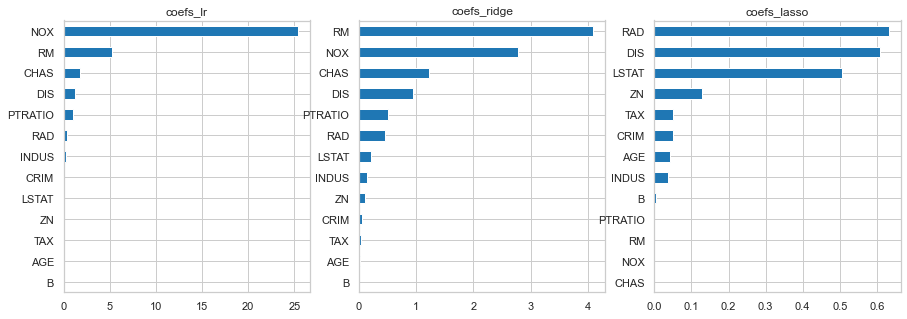

In [16]:
f = plt.figure(figsize=(15,5))
ax1 = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

coefs_lr.plot(kind="barh", title='coefs_lr', ax=ax1)
coefs_ridge.plot(kind="barh", title='coefs_ridge', ax=ax2)
coefs_lasso.plot(kind="barh", title='coefs_lasso', ax=ax3)

In [17]:
print('Non important variables: {}'.format(coefs_lasso.index[coefs_lasso==0].values))
print('Most important variable: {}'.format(coefs_lasso.index[-1]))

Non important variables: ['CHAS' 'NOX' 'RM' 'PTRATIO']
Most important variable: RAD


In [18]:
scores = [[r2score_train, r2score_test],
         [r2score_ridge_train, r2score_ridge_test],
         [r2score_lasso_train, r2score_lasso_test]]
df_scores = pd.DataFrame(scores, columns=["Train", "Test"], index=["No regularization", "Ridge", "Lasso"])
#df_scores.sort_values(by="test_score", ascending=False, inplace=True)
df_scores

,Train,Test
No regularization,0.867757,0.622471
Ridge,0.843407,0.623805
Lasso,0.776146,0.494413


## Transform and Predict 

In [19]:
# Look at mean and average values of our predictors
for i, feat in enumerate(features):
    print()
    print(feat)
    print("Max {}, min {}, mean {}, and var {}".format(np.max(X[:, i]), np.min(X[:, i]), np.mean(X[:, i]), np.var(X[:, i])))


CRIM
Max 88.9762, min 0.00632, mean 3.613523557312254, and var 73.84035966507905

ZN
Max 100.0, min 0.0, mean 11.363636363636363, and var 542.8618397412864

INDUS
Max 27.74, min 0.46, mean 11.13677865612648, and var 46.97142974152072

CHAS
Max 1.0, min 0.0, mean 0.0691699604743083, and var 0.06438547704229093

NOX
Max 0.871, min 0.385, mean 0.5546950592885376, and var 0.013401098888632846

RM
Max 8.78, min 3.561, mean 6.284634387351779, and var 0.49269521612976297

AGE
Max 100.0, min 2.9, mean 68.57490118577076, and var 790.7924728163227

DIS
Max 12.1265, min 1.1296, mean 3.795042687747036, and var 4.425252261616491

RAD
Max 24.0, min 1.0, mean 9.549407114624506, and var 75.66653126904029

TAX
Max 711.0, min 187.0, mean 408.2371541501976, and var 28348.62359980628

PTRATIO
Max 22.0, min 12.6, mean 18.455533596837945, and var 4.677726296302081

B
Max 396.9, min 0.32, mean 356.6740316205534, and var 8318.280420504929

LSTAT
Max 37.97, min 1.73, mean 12.653063241106722, and var 50.893979

There is a special type of ``Estimator`` called ``Transformer`` which transforms the input data -- e.g. selects a subset of the features or extracts new features based on the original ones.

One transformer that we will use here is ``sklearn.preprocessing.StandardScaler``. This transformer centers each predictor in ``X`` to have zero mean and unit variance and is useful.

In [20]:
# Train test split
from sklearn.preprocessing import StandardScaler

scalerX = StandardScaler().fit(X_train) # Create the transformer StandardScaler and perform the fitting for the training data

X_train_norm = scalerX.transform(X_train)
X_test_norm = scalerX.transform(X_test)

print("\nBefore transformation:")
print('Train: Max {}, min {}, mean {}, and var {}'.format(np.max(X_train), np.min(X_train), np.mean(X_train), np.var(X_train)))
print('Test: Max {}, min {}, mean {}, and var {}'.format(np.max(X_test), np.min(X_test), np.mean(X_test), np.var(X_test)))

print("\nAfter transformation:")
print('Train: Max {}, min {}, mean {}, and var {}'.format(np.max(X_train_norm), np.min(X_train_norm), np.mean(X_train_norm), np.var(X_train_norm)))
print('Test: Max {}, min {}, mean {}, and var {}'.format(np.max(X_test_norm), np.min(X_test_norm), np.mean(X_test_norm), np.var(X_test_norm)))



Before transformation:
Train: Max 666.0, min 0.0, mean 72.19228883076923, and var 21778.722090162235
Test: Max 711.0, min 0.0, mean 69.84169491902834, and var 20991.888021571125

After transformation:
Train: Max 4.65818871161953, min -5.308456227469241, mean -3.853327913160543e-16, and var 0.9999999999999998
Test: Max 11.45694924208993, min -6.93444941066249, mean -0.048888297589274335, and var 1.2415175023679657


In [21]:
for i, feat in enumerate(features):
    print()
    print(feat)
    print("\nBefore transformation:")
    print('Train: Max {}, min {}, mean {}, and var {}'.format(np.max(X_train[:, i]), np.min(X_train[:, i]), np.mean(X_train[:, i]), np.var(X_train[:, i])))
    print('Test: Max {}, min {}, mean {}, and var {}'.format(np.max(X_test[:, i]), np.min(X_test[:, i]), np.mean(X_test[:, i]), np.var(X_test[:, i])))

    print("\nAfter transformation:")
    print('Train: Max {}, min {}, mean {}, and var {}'.format(np.max(X_train_norm[:, i]), np.min(X_train_norm[:, i]), np.mean(X_train_norm[:, i]), np.var(X_train_norm[:, i])))
    print('Test: Max {}, min {}, mean {}, and var {}'.format(np.max(X_test_norm[:, i]), np.min(X_test_norm[:, i]), np.mean(X_test_norm[:, i]), np.var(X_test_norm[:, i])))



CRIM

Before transformation:
Train: Max 38.3518, min 0.02731, mean 3.6663588000000003, and var 55.44473205324656
Test: Max 88.9762, min 0.00632, mean 3.607730219298246, and var 75.85708444101574

After transformation:
Train: Max 4.65818871161953, min -0.48871732504277926, mean -1.8984813721090176e-16, and var 1.0000000000000002
Test: Max 11.45694924208993, min -0.49153624207754065, mean -0.007873706758649908, and var 1.3681567505487466

ZN

Before transformation:
Train: Max 95.0, min 0.0, mean 9.86, and var 502.0304000000001
Test: Max 100.0, min 0.0, mean 11.528508771929825, and var 547.0638802323792

After transformation:
Train: Max 3.7998691144997623, min -0.4400600125554105, mean 5.551115123125783e-17, and var 0.9999999999999997
Test: Max 4.023023279081613, min -0.4400600125554105, mean 0.07446693621949815, and var 1.0897026957578244

INDUS

Before transformation:
Train: Max 21.89, min 1.69, mean 11.545000000000002, and var 38.98781700000001
Test: Max 27.74, min 0.46, mean 11.09201

Let's now compare the coefficients we would obtain if we use the standarized variables matrix instead.

In [22]:
# Train model
lr_norm = linear_model.LinearRegression()
ridge_norm = linear_model.Ridge(alpha=.3)
lasso_norm = linear_model.Lasso(alpha=.3)

lr_norm.fit(X_train_norm, y_train)
ridge_norm.fit(X_train_norm, y_train)
lasso_norm.fit(X_train_norm, y_train)

coefs_lr_norm = pd.Series(np.abs(lr_norm.coef_), boston.feature_names).sort_values()
coefs_ridge_norm = pd.Series(np.abs(ridge_norm.coef_), boston.feature_names).sort_values()
coefs_lasso_norm = pd.Series(np.abs(lasso_norm.coef_), boston.feature_names).sort_values()

<AxesSubplot:title={'center':'coefs_lasso'}>

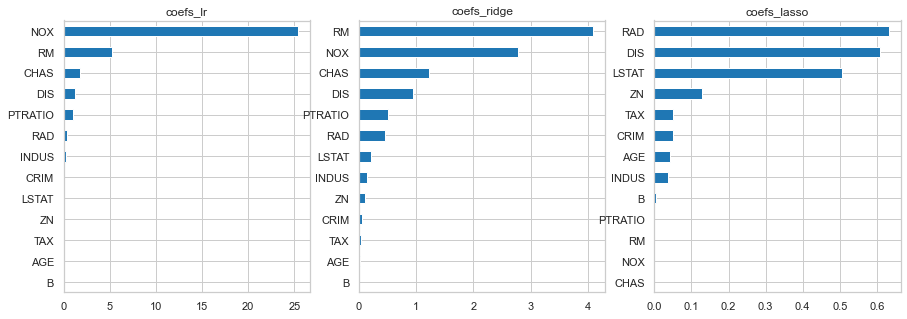

In [23]:
f = plt.figure(figsize=(15,5))
ax1 = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

coefs_lr.plot(kind="barh", title='coefs_lr', ax=ax1)
coefs_ridge.plot(kind="barh", title='coefs_ridge', ax=ax2)
coefs_lasso.plot(kind="barh", title='coefs_lasso', ax=ax3)

<AxesSubplot:title={'center':'coefs_lasso_norm'}>

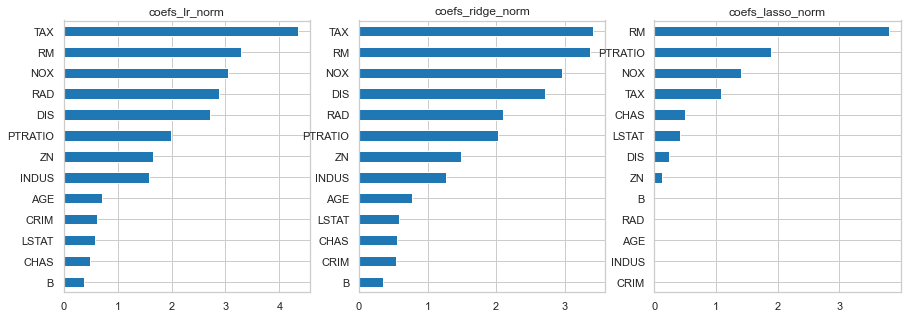

In [24]:
f = plt.figure(figsize=(15,5))
ax1 = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

coefs_lr_norm.plot(kind="barh", title='coefs_lr_norm', ax=ax1)
coefs_ridge_norm.plot(kind="barh", title='coefs_ridge_norm', ax=ax2)
coefs_lasso_norm.plot(kind="barh", title='coefs_lasso_norm', ax=ax3)

In [25]:
print('Non important variables:')
print('Before transformation: {}'.format(sorted(coefs_lasso.index[coefs_lasso_norm==0].values)))
print('After transformation: {}'.format(sorted(coefs_lasso_norm.index[coefs_lasso_norm==0].values)))
print('Most important variable:')
print('Before transformation: {}'.format(coefs_lasso.index[-1]))
print('After transformation: {}'.format(coefs_lasso_norm.index[-1]))

Non important variables:
Before transformation: ['B', 'CHAS', 'NOX', 'PTRATIO', 'RM']
After transformation: ['AGE', 'B', 'CRIM', 'INDUS', 'RAD']
Most important variable:
Before transformation: RAD
After transformation: RM


In [26]:
# Scores
print('lr: {}'.format(lr.score(X_test, y_test)))
print('ridge: {}'.format(ridge.score(X_test, y_test)))
print('lasso: {}'.format(lasso.score(X_test, y_test)))
print('lr_norm: {}'.format(lr_norm.score(X_test_norm, y_test)))
print('ridge_norm: {}'.format(ridge_norm.score(X_test_norm, y_test)))
print('lasso_norm: {}'.format(lasso_norm.score(X_test_norm, y_test)))

lr: 0.6224709227757255
ridge: 0.6238045026532295
lasso: 0.4944134348320205
lr_norm: 0.622470922775735
ridge_norm: 0.6296604739319267
lasso_norm: 0.6101053670288366


### Tuning Ridge and Lasso regressors

In [27]:
n_alphas = 100
alphas = np.logspace(-2, 2, n_alphas)

coefs_ridge = []
r2_ridge = []
for l in alphas:
    regr_ridge = linear_model.Ridge(alpha=l) # Create a Ridge regressor
    regr_ridge.fit(X_train_norm, y_train)  # Perform the fitting
    coefs_ridge.append(regr_ridge.coef_)
    r2_ridge.append(regr_ridge.score(X_test_norm,y_test))

    
coefs_lasso = []
r2_lasso = []
for l in alphas:
    regr_lasso = linear_model.Lasso(alpha=l,tol =0.001) # Create a Ridge regressor
    regr_lasso.fit(X_train_norm, y_train)  # Perform the fitting
    coefs_lasso.append(regr_lasso.coef_)
    r2_lasso.append(regr_lasso.score(X_test_norm,y_test))

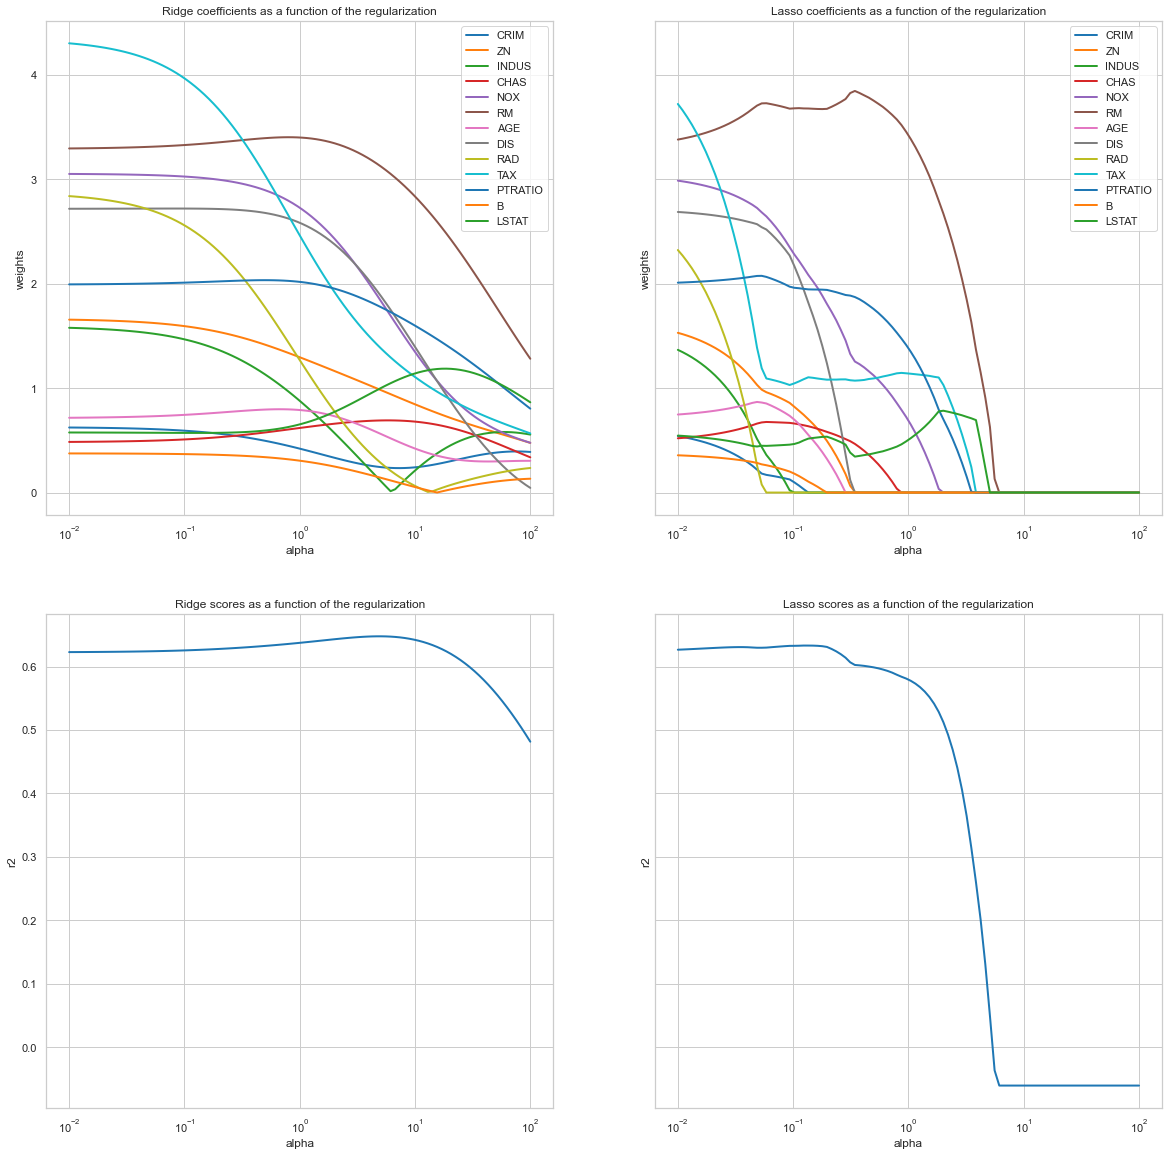

In [28]:
# Display results

fig, axs = plt.subplots(2, 2, figsize=(20, 20), sharey='row')


axs[0,0].plot(alphas, np.abs(coefs_ridge))
axs[0,0].set_xscale('log')
axs[0,0].set_title('Ridge coefficients as a function of the regularization')
axs[0,0].axis('tight')
axs[0,0].set_xlabel('alpha')
axs[0,0].set_ylabel('weights')
axs[0,0].legend(boston.feature_names)

axs[0,1].plot(alphas, np.abs(coefs_lasso))
axs[0,1].set_xscale('log')
axs[0,1].set_title('Lasso coefficients as a function of the regularization')
axs[0,1].axis('tight')
axs[0,1].set_xlabel('alpha')
axs[0,1].set_ylabel('weights')
axs[0,1].legend(boston.feature_names)

axs[1,0].plot(alphas, r2_ridge)
axs[1,0].set_xscale('log')
axs[1,0].set_title('Ridge scores as a function of the regularization')
axs[1,0].axis('tight')
axs[1,0].set_xlabel('alpha')
axs[1,0].set_ylabel('r2')

axs[1,1].plot(alphas, r2_lasso)
axs[1,1].set_xscale('log')
axs[1,1].set_title('Lasso scores as a function of the regularization')
axs[1,1].axis('tight')
axs[1,1].set_xlabel('alpha')
axs[1,1].set_ylabel('r2')


plt.show()

In [29]:
# Find optimal alphas
best_r2_ridge = max(r2_ridge)
max_index_ridge = r2_ridge.index(best_r2_ridge)
best_alpha_ridge = alphas[max_index_ridge]
print(max_index_ridge, best_alpha_ridge, best_r2_ridge, r2_ridge[max_index_ridge])

best_r2_lasso = max(r2_lasso)
max_index_lasso = r2_lasso.index(best_r2_lasso)
best_alpha_lasso = alphas[max_index_lasso]
print(max_index_lasso, best_alpha_lasso, best_r2_lasso, r2_lasso[max_index_lasso])

67 5.09413801481638 0.6477062785951344 0.6477062785951344
27 0.12328467394420665 0.6331388765145642 0.6331388765145642


In [30]:
print(r2score_test, r2score_train)

0.6224709227757255 0.8677571093777259


In [31]:
lasso = linear_model.Lasso(alpha=best_alpha_lasso)
lasso.fit(X_train_norm, y_train)
coefs = pd.Series(np.abs(lasso.coef_), features).sort_values()

In [32]:
coefs

INDUS      0.000000
RAD        0.000000
CRIM       0.044046
B          0.137279
LSTAT      0.483293
AGE        0.619532
CHAS       0.645262
ZN         0.745091
TAX        1.067572
PTRATIO    1.957578
DIS        1.961109
NOX        2.175540
RM         3.683385
dtype: float64

In [33]:
df = pd.DataFrame(X_train_norm, columns=features)

In [34]:
df['targ'] = y_train

In [35]:
features

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

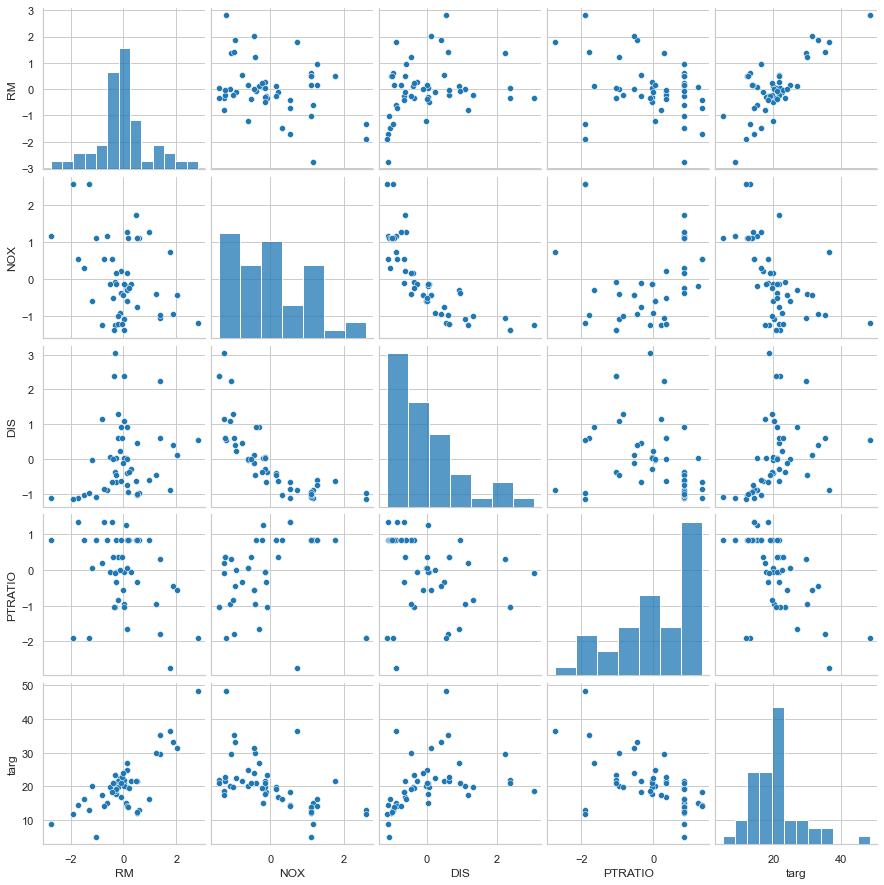

In [36]:
sns.pairplot(df[['RM', 'NOX', 'DIS', 'PTRATIO', 'targ']])

### Feature selection with Sklearn

We can also select the most important features with sklearn:

In [37]:
import sklearn.feature_selection as fs 
selector = fs.SelectKBest(score_func = fs.f_regression, k=5)

X_new_train = selector.fit_transform(X_train,y_train)
X_new_test = selector.transform(X_test)

print('Non important variables: {}'.format(boston.feature_names[selector.get_support()==False]))
print('Relevant variables: {}'.format(boston.feature_names[selector.get_support()]))

Non important variables: ['CRIM' 'ZN' 'CHAS' 'NOX' 'AGE' 'DIS' 'RAD' 'B']
Relevant variables: ['INDUS' 'RM' 'TAX' 'PTRATIO' 'LSTAT']


In [38]:
X_new_train.shape

(50, 5)

The set of selected features is now different, since the criterion has changed. 

SelectKBest method selects features according to the k highest scores. The scored is calculated using the score_func. 
In this case, we use f_regression as our scoring function, which returns the F-statistic and p-values of univariate linear regression tests from each feature in X against y.

<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

**EXERCISE 3** Diabetes <p>

The diabetes dataset (from scikit-learn) consists of 10 physiological variables (age, sex, weight, blood pressure) measure on 442 patients, and an indication of disease progression after one year.<p>

We will explore the performance of Linear Regression model and LASSO model for prediction.<p>

Fill the gaps of the exercise.

</div>

Load the data

In [39]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X,y = diabetes.data, diabetes.target
print(X.shape, y.shape)

(442, 10) (442,)


In [40]:
features = diabetes.feature_names
features

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Evaluate the prediction using a simple and a multiple regression model

In [41]:
df = pd.DataFrame(X, columns=features)
df['targ'] = y
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,targ
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


<AxesSubplot:>

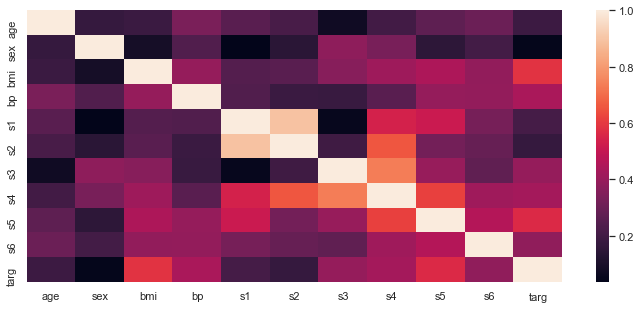

In [42]:
corr_mat = np.abs(df.corr())
sns.heatmap(corr_mat)

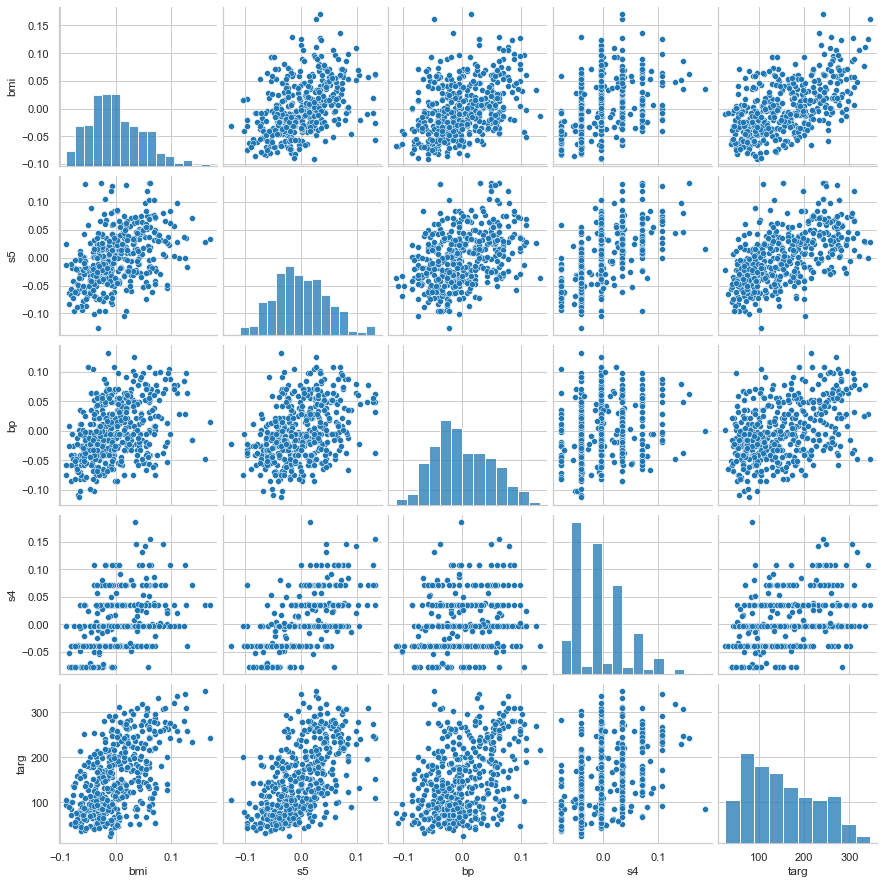

In [43]:
sns.pairplot(data=df[['bmi', 's5', 'bp', 's4', 'targ']])

In [44]:
df_train, df_test = train_test_split(df, test_size=0.2)
print(df_train.shape, df_test.shape)

(353, 11) (89, 11)


For the simple model, first choose one of the dimensions of the data. Try some plots to identify possible linear relationships between the predictor and target variables. Pick one variable for your first model.

In [45]:
X_train = df_train[['s5']]
y_train = df_train['targ']
print(X_train.shape, y_train.shape)

(353, 1) (353,)


In [46]:
X_test = df_test[['s5']]
y_test = df_test['targ']
print(X_test.shape, y_test.shape)

(89, 1) (89,)


In [47]:
lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.score(X_train, y_train), lm.score(X_test, y_test))

0.30357294041669214 0.4005110457853365


Divide in training and testing sets and evaluate the prediction (sklearn) with a multiple regression model.

In [48]:
X_train = df_train.drop(columns='targ')
y_train = df_train['targ']

X_test = df_test.drop(columns='targ')
y_test = df_test['targ']


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [49]:
lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.score(X_train, y_train), lm.score(X_test, y_test))

print(lm.coef_)

0.5288646394141608 0.44794618424562604
[  33.64364522 -256.57336954  540.09047348  349.33197841 -699.05101079
  321.68146067   39.9748284   217.72874618  667.27894441   56.55476231]


For multiple regression model divide in training and testing sets and evaluate the prediction (sklearn) without and with LASSO regularization.

In [50]:
scaler = StandardScaler()
X_train_new = scaler.fit_transform(X_train)
X_test_new = scaler.transform(X_test)

In [51]:
lm = linear_model.Lasso(alpha=1)
lm.fit(X_train_new, y_train)
print(lm.score(X_train_new, y_train), lm.score(X_test_new, y_test))

0.5253177622796408 0.4576398300797826


In [52]:
pd.Series(np.abs(lm.coef_), features).sort_values()

s2      0.000000
age     0.457647
s4      1.368187
s6      2.389772
s1      7.676534
sex     9.907249
s3     10.706690
bp     16.068911
s5     23.538186
bmi    26.052383
dtype: float64

 Almost the same results with less "activated" coefficients (the result has 3 zero coefficients).


Is the score different? How many predictors are we using now?

<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

**EXERCISE 4: The Big Mart Sales** <p>

Use the [Big Mart Sales dataset](https://www.kaggle.com/brijbhushannanda1979/bigmart-sales-data). In the data set, we have product wise Sales for Multiple outlets of a chain. 

In particular, we can see characteristics of the sold item (fat content, visibility, type, price) and some characteristics of the outlet (year of establishment, size, location, type) and the number of the items sold for that particular item. Let’s see if we can predict sales using these features.


Implement the following analysis:
<ul>
    <li> Read the train and test files in a pandas DataFrame
    <li> Clean the data (some missing values are present)    
    <li> Convert categorical variables into numeric values and exclude 'Item_Identifier' and 'Item_Outlet_Sales' (which is the target).
    <li> Study which are the variables with the highest (lowest) correlation with the target variable.
    <li> Apply linear regression using all features.
    <li> Build the residual plot and give an interpretation of it 
    <li> Choose a polynomial regression model to better fit the data.
    <li> Compare ridge and lasso regressors.  
    <li> Compare the magnitude of coefficients of the different models
    <li> Estimate which are the best features for prediction.
</div>

Read the train and test files in a pandas DataFrame

In [53]:
# Load data:
df_train = pd.read_csv('files/ch06/bigmart-sales-data/Train.csv')

df_test = pd.read_csv('files/ch06/bigmart-sales-data/test.csv')

df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Clean the data (some missing values are present)

In [54]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Observe missing data in Item_Weight and Outlet_Size. Let's see how these variables look like.

12.857645184136183 4.643456499186395


(array([132., 351., 403., 467., 401., 464., 358., 306., 373., 406., 342.,
        287., 354., 401., 346., 389., 314., 363., 370., 233.]),
 array([ 4.555  ,  5.39475,  6.2345 ,  7.07425,  7.914  ,  8.75375,
         9.5935 , 10.43325, 11.273  , 12.11275, 12.9525 , 13.79225,
        14.632  , 15.47175, 16.3115 , 17.15125, 17.991  , 18.83075,
        19.6705 , 20.51025, 21.35   ]),
 <BarContainer object of 20 artists>)

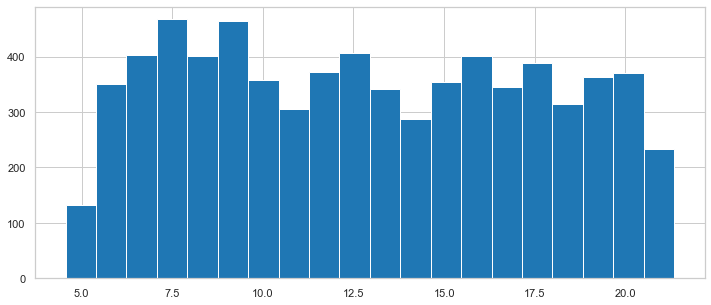

In [55]:
print(df_train.Item_Weight.mean(), df_train.Item_Weight.std())
plt.hist(df_train.Item_Weight, bins=20)

In [56]:
# Replace nulls Item_Weight in with mean
mean_Item_Weight = df_train.Item_Weight.mean()
df_train2 =  df_train.copy()
df_test2 =  df_test.copy()

print(mean_Item_Weight)
df_train2[['Item_Weight']] = df_train2[['Item_Weight']].fillna(value=mean_Item_Weight)
df_test2[['Item_Weight']] = df_test2[['Item_Weight']].fillna(value=mean_Item_Weight)
df_train2[df_train.Item_Weight.isna()]

12.857645184136183


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,12.857645,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,12.857645,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,12.857645,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,12.857645,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,12.857645,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,12.857645,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,12.857645,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,12.857645,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

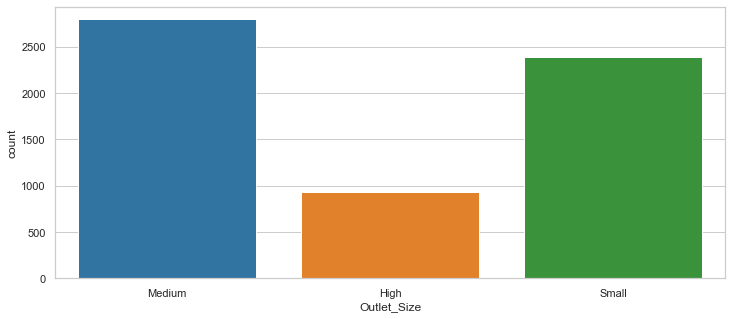

In [57]:
sns.countplot(x="Outlet_Size", data=df_train2)

In [58]:
df_train2[['Outlet_Size']].value_counts()

Outlet_Size
Medium         2793
Small          2388
High            932
dtype: int64

In [59]:
# We'll fill the empty values of Outlet_Size with medium, since it´s the most common value.
df_train2[['Outlet_Size']] = df_train2[['Outlet_Size']].fillna(value='Medium')
df_test2[['Outlet_Size']] = df_test2[['Outlet_Size']].fillna(value='Medium')
df_train2[['Outlet_Size']].value_counts()

Outlet_Size
Medium         5203
Small          2388
High            932
dtype: int64

Convert categorical variables into numeric values and exclude 'Item_Identifier' and 'Item_Outlet_Sales' (which is the target)

In [60]:
y = df_train2['Item_Outlet_Sales']

df_train2.drop(columns=['Item_Identifier','Item_Outlet_Sales'], inplace=True)
df_test2.drop(columns=['Item_Identifier'], inplace=True)

In [61]:
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 666.0+ KB


In [62]:
cols_num = ['Item_Weight', 'Item_Visibility', 'Item_MRP','Outlet_Establishment_Year']
cols_cat = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

In [63]:
for col in cols_cat:
    print()
    print(df_train2[[col]].value_counts())


Item_Fat_Content
Low Fat             5089
Regular             2889
LF                   316
reg                  117
low fat              112
dtype: int64

Item_Type            
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
dtype: int64

Outlet_Identifier
OUT027               935
OUT013               932
OUT035               930
OUT046               930
OUT049               930
OUT045               929
OUT018               928
OUT017               926
OUT010               555
OUT019               528
dtype: int64

Outlet_Size
Medium         5203
Small        

In [65]:
df_train2 = pd.get_dummies(df_train2, drop_first=True)
df_test2 = pd.get_dummies(df_test2, drop_first=True)
df_test2

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750000,0.007565,107.8622,1999,1,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1,8.300000,0.038428,87.3198,2007,0,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
2,14.600000,0.099575,241.7538,1998,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,7.315000,0.015388,155.0340,2007,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
4,12.857645,0.118599,234.2300,1985,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,0.013496,141.3154,1997,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
5677,7.600000,0.142991,169.1448,2009,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
5678,10.000000,0.073529,118.7440,2002,1,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
5679,15.300000,0.000000,214.6218,2007,0,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0


Study which are the variables with the highest (lowest) correlation with the target variable.

In [66]:
cols_num = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
X_num = df_train2[cols_num].values
X_num_test = df_test2[cols_num].values
(X_num.shape, X_num_test.shape)

((8523, 4), (5681, 4))

In [67]:
from sklearn.preprocessing import StandardScaler

scalerX = StandardScaler().fit(X_num) # Create the transformer StandardScaler and perform the fitting for the training data

X_num = scalerX.transform(X_num)
X_num_test = scalerX.transform(X_num_test)

In [68]:
df_train2

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1999,1,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,2009,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2,17.500,0.016760,141.6180,1999,1,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,1998,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.930,0.000000,53.8614,1987,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8519,8.380,0.046982,108.1570,2002,0,1,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
8520,10.600,0.035186,85.1224,2004,1,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
8521,7.210,0.145221,103.1332,2009,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [69]:
df_train2[cols_num] = X_num
df_test2[cols_num] = X_num_test
df_train2

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.841872,-0.970732,1.747454,0.139541,1,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1,-1.641706,-0.908111,-1.489023,1.334103,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2,1.098554,-0.956917,0.010040,0.139541,1,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3,1.500838,-1.281758,0.660050,0.020085,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,-0.929428,-1.281758,-1.399220,-1.293934,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.418084,-0.181193,1.180783,-1.293934,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8519,-1.059578,-0.371154,-0.527301,0.497909,0,1,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
8520,-0.534243,-0.599784,-0.897208,0.736822,1,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
8521,-1.336444,1.532880,-0.607977,1.334103,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


<AxesSubplot:>

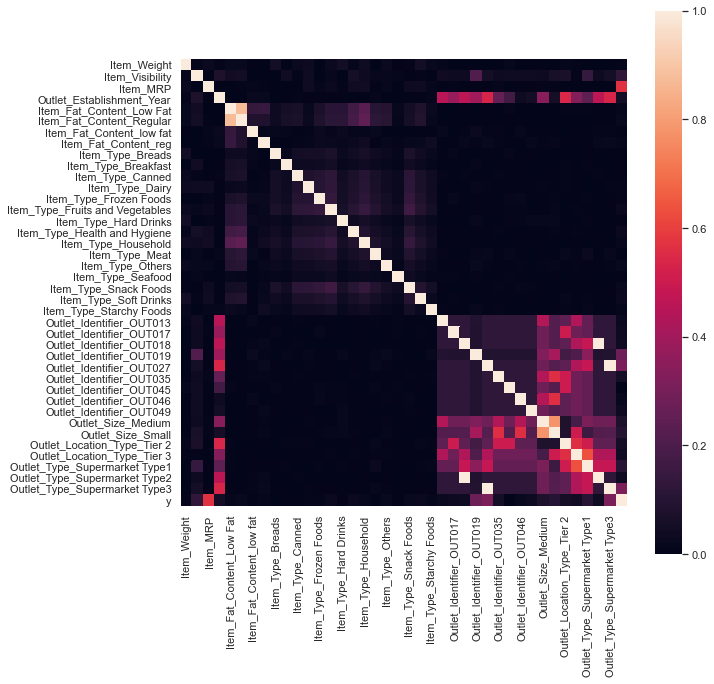

In [70]:
df_train2['y'] = y
corr_mat = np.abs(df_train2.corr())

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_mat, square=True, ax=ax)

In [71]:
corr_mat.y.sort_values(ascending=False)

y                                  1.000000
Item_MRP                           0.567574
Outlet_Identifier_OUT027           0.311192
Outlet_Type_Supermarket Type3      0.311192
Outlet_Identifier_OUT019           0.277250
Item_Visibility                    0.128625
Outlet_Type_Supermarket Type1      0.108765
Outlet_Size_Small                  0.098403
Outlet_Size_Medium                 0.075154
Outlet_Location_Type_Tier 2        0.058261
Outlet_Identifier_OUT035           0.052823
Outlet_Establishment_Year          0.049135
Outlet_Location_Type_Tier 3        0.046376
Outlet_Type_Supermarket Type2      0.038059
Outlet_Identifier_OUT018           0.038059
Outlet_Identifier_OUT049           0.034264
Outlet_Identifier_OUT017           0.032610
Item_Type_Fruits and Vegetables    0.025950
Item_Type_Health and Hygiene       0.025587
Outlet_Identifier_OUT013           0.024170
Item_Type_Soft Drinks              0.024040
Item_Type_Snack Foods              0.022782
Item_Fat_Content_Regular        

Apply linear regression using all features.

In [72]:
X = df_train2.drop(columns=['y'])
X.shape

(8523, 39)

In [73]:
lr = LinearRegression()
lr.fit(X, y)

y_pred = lr.predict(X)

print(lr.score(X, y))

0.5638263152970147


Build the residual plot and give an interpretation of it

Text(0, 0.5, '$y - \\hat y$')

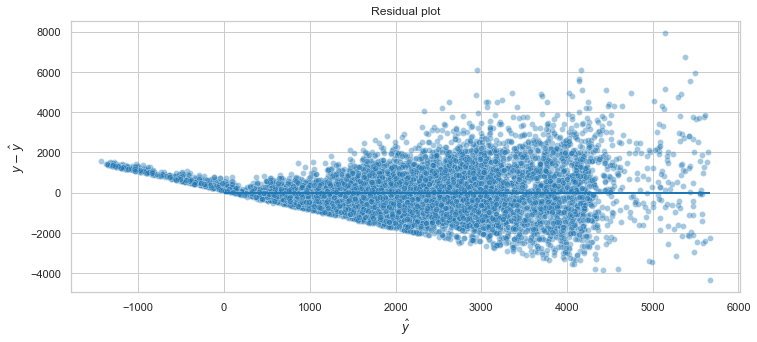

In [74]:
sns.scatterplot(x = y_pred, y = y - y_pred, alpha=0.4)

plt.hlines(y=0, xmin= 0, xmax=y_pred.max())
plt.title('Residual plot')
plt.xlabel('$\hat y$')
plt.ylabel('$y - \hat y$')

Text(0, 0.5, '$\\hat y$')

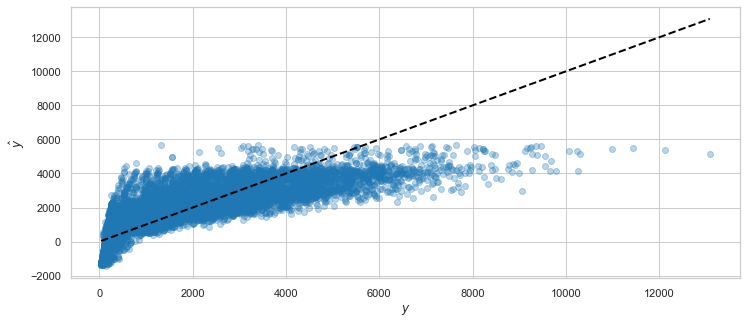

In [75]:
plt.scatter(y, y_pred, alpha=0.3)

plt.plot([y.min(), y.max()], [y.min(), y.max()], '--k')
plt.axis('tight')
plt.xlabel('$y$')
plt.ylabel('$\hat y$')

Choose a polynomial regression model to better fit the data.

In [76]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly = PolynomialFeatures(degree=2)
X2 = poly.fit_transform(X)

clf = linear_model.LinearRegression()
clf.fit(X2, y)

print(clf.score(X2, y))

0.619274467133476


Compare ridge and lasso regressors.

In [77]:
from sklearn import linear_model
from sklearn.linear_model import Ridge, Lasso
#lr = LinearRegression()
#lr.fit(X, y)

ridge = Ridge(alpha=.5)
ridge.fit(X, y)

lasso = Lasso(alpha=.5)
lasso.fit(X, y)

print(lr.score(X, y), ridge.score(X, y), lasso.score(X, y))

0.5638263152970147 0.5638366656469607 0.5637677472777741


Compare the magnitude of coefficients of the different models

In [78]:
coefs_lr = pd.Series(lr.coef_, df_train2.columns[:-1]).sort_values()
coefs_ridge = pd.Series(ridge.coef_, df_train2.columns[:-1]).sort_values()
coefs_lasso = pd.Series(lasso.coef_, df_train2.columns[:-1]).sort_values()

In [79]:
print(coefs_lr)

Outlet_Identifier_OUT018          -1.107921e+15
Outlet_Type_Supermarket Type1     -3.375216e+14
Outlet_Location_Type_Tier 3       -2.356374e+14
Outlet_Identifier_OUT027          -2.302069e+14
Outlet_Location_Type_Tier 2       -1.460582e+14
Outlet_Size_Small                 -4.094752e+13
Item_Type_Dairy                   -5.539935e+01
Item_Type_Soft Drinks             -4.360695e+01
Item_Type_Household               -3.866857e+01
Item_Type_Frozen Foods            -3.556831e+01
Item_Fat_Content_reg              -3.149325e+01
Item_Type_Others                  -2.315528e+01
Item_Type_Snack Foods             -2.306493e+01
Item_Type_Health and Hygiene      -1.616448e+01
Item_Visibility                   -1.587002e+01
Item_Type_Meat                    -8.733618e+00
Item_Type_Hard Drinks             -7.103967e+00
Item_Type_Breakfast               -2.555591e+00
Item_Weight                       -2.069824e+00
Item_Type_Breads                   2.692194e+00
Item_Type_Fruits and Vegetables    2.138

In [80]:
print(coefs_ridge)

Outlet_Identifier_OUT019           -623.084512
Outlet_Location_Type_Tier 3        -368.620620
Outlet_Establishment_Year          -187.832436
Outlet_Size_Small                  -152.660810
Outlet_Size_Medium                 -129.627272
Outlet_Identifier_OUT045            -72.407097
Item_Type_Dairy                     -41.645731
Item_Type_Household                 -39.190737
Item_Fat_Content_reg                -29.811238
Item_Type_Soft Drinks               -27.747318
Item_Type_Frozen Foods              -27.601119
Item_Type_Others                    -21.054264
Item_Visibility                     -15.932813
Item_Type_Snack Foods               -11.478083
Item_Type_Health and Hygiene        -10.801048
Item_Weight                          -2.135196
Item_Type_Hard Drinks                -1.660770
Item_Type_Meat                       -1.046694
Item_Type_Breads                      3.917126
Item_Type_Breakfast                   7.004312
Item_Type_Canned                     24.949863
Item_Type_Sta

In [81]:
print(coefs_lasso)

Outlet_Identifier_OUT045           -153.349431
Outlet_Identifier_OUT046            -71.912999
Item_Type_Dairy                     -29.730101
Item_Type_Household                 -28.345935
Outlet_Location_Type_Tier 3         -23.061235
Item_Type_Frozen Foods              -17.931169
Item_Fat_Content_reg                -16.594755
Item_Visibility                     -16.219108
Item_Type_Soft Drinks               -12.481865
Item_Type_Snack Foods                -2.446712
Item_Weight                          -1.807733
Item_Type_Breakfast                   0.000000
Outlet_Size_Small                     0.000000
Outlet_Identifier_OUT019              0.000000
Outlet_Identifier_OUT017              0.000000
Outlet_Identifier_OUT013              0.000000
Item_Type_Starchy Foods               0.000000
Outlet_Location_Type_Tier 2           0.000000
Outlet_Size_Medium                   -0.000000
Item_Type_Meat                        0.000000
Item_Type_Health and Hygiene         -0.000000
Item_Type_Har

Estimate which are the best features for prediction.

In [82]:
features = df_train2.columns[:-1]
features

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Fat_Content_low fat',
       'Item_Fat_Content_reg', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 

In [83]:
import sklearn.feature_selection as fs 
selector = fs.SelectKBest(score_func = fs.f_regression,k=5)

X_new = selector.fit_transform(X,y)

print('Non important variables: {}'.format(features[selector.get_support()==False]))
print('Relevant variables: {}'.format(features[selector.get_support()]))

Non important variables: Index(['Item_Weight', 'Outlet_Establishment_Year', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Fat_Content_low fat',
       'Item_Fat_Content_reg', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2']

<div class="alert" style = "border-radius:10px;border-width:3px;border-color:darkblue;font-family:Verdana,sans-serif;font-size:16px;">

**EXTRA ANALYSIS FOR THE BOSTON DATA** 

In order to compare the fitting of the lineal and polynomial regression models we can also use the sklearn library.

Next we add a quantitative evaluation of the two models.

In [84]:
boston = datasets.load_boston()
X_boston,y_boston = boston.data, boston.target

In [85]:
# Evaluation of the linear model
X_boston,y_boston = boston.data, boston.target

regr_boston = LinearRegression()
regr_boston.fit(X_boston, y_boston) 

#print('Coeff and intercept: {} {}'.format(regr_boston.coef_, regr_boston.intercept_))
print('Multiple Linear regression Score: {}'.format(regr_boston.score(X_boston, y_boston)))
print('Multiple Linear regression MSE: {}'.format(np.mean((regr_boston.predict(X_boston) - y_boston)**2)))

Multiple Linear regression Score: 0.7406426641094095
Multiple Linear regression MSE: 21.894831181729202


In [86]:
# Evaluation of the polynomial model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

regr_pol = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
regr_pol.fit(X_boston, y_boston) 

#print('Coeff and intercept: {} {}'.format(regr_pol.named_steps['linear'].coef_, regr_pol.named_steps['linear'].intercept_))
print('Multiple Polynomial regression Score: {}'.format(regr_pol.score(X_boston, y_boston)))
print('Multiple Polynomial regression MSE: {}'.format(np.mean((regr_pol.predict(X_boston) - y_boston)**2)))

Multiple Polynomial regression Score: 0.928996171459302
Multiple Polynomial regression MSE: 5.994111690794205


For the simple regresssion, we first need to extract one of the features and then use the same methods:

In [87]:
# Quantitative evaluation of the SIMPLE lineal and polynomial regression:
bostonDF = pd.DataFrame(boston.data)
bostonDF.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
bostonDF.columns=boston.feature_names 
bostonDF.head()

In [ ]:
x=bostonDF['LSTAT']
y=boston.target
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)

In [ ]:
regr_boston = LinearRegression()
regr_boston.fit(x, y) 

print('Simple linear regression Score: {}'.format(regr_boston.score(x, y)))
print('Simple linear regression MSE: {}'.format(np.mean((regr_boston.predict(x) - y)**2)))

regr_pol = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
regr_pol.fit(x, y) 

print('Simple Polynomial regression (order 2) Score: {}'.format(regr_pol.score(x, y)))
print('Simple Polynomial regression (order 2) MSE: {}'.format(np.mean((regr_pol.predict(x) - y)**2)))

regr_pol = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
regr_pol.fit(x, y) 

print('Simple Polynomial regression (order 3) Score: {}'.format(regr_pol.score(x, y)))
print('Simple Polynomial regression (order 3) MSE: {}'.format(np.mean((regr_pol.predict(x) - y)**2)))

<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">
    
**EXERCISE 2: Macroeconomic dataset**

<p>To start with we load the Longley dataset of US macroeconomic data from the R datasets website. Macroeconomic data from 1947 to 1962.</p>
    
</div>

In [ ]:
# Read data
df = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/datasets/longley.csv', index_col=0)
df.head()

# Clean column names
df.columns = ['GNPdeflator', 'GNP', 'Unemployed', 'ArmedForces', 'Population','Year', 'Employed']
features = ['GNPdeflator','Unemployed','ArmedForces','Population','Year','Employed']
target = 'GNP'

# Create X matrix and y vector from the dataset
X = df[features].values
y = df[target].values

print('Shape of data: {} {}'.format(X.shape, y.shape))

In [ ]:
# Fitting a multiple linear model
lin_reg = LinearRegression() # Create the Linear Regression estimator
lin_reg.fit(X, y) # Perform the fitting


# Regrerssion coefs
coefs = pd.Series(lin_reg.coef_, features).sort_values()

# Prediction
y_pred = lin_reg.predict(X)

# evaluation
mse = mean_squared_error(y, y_pred)
r2score = lin_reg.score(X, y)

# The coefficients
print('\nIntercept and coefs:\n{} {}'.format(lin_reg.intercept_, lin_reg.coef_))
# The mean squared error
print('\nMSE: {}'.format(mse))
# The coefficient of determination: 1 is perfect prediction
print('R^2 Score: {}'.format(r2score))

In [ ]:
# Plotting abs value of model coefficients
np.abs(coefs).sort_values().plot(kind='bar', title='Model Coefficients')